In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

os.getcwd()

'/homes/iws/bhimar/cse481ds-mental-health/notebooks/county_level'

In [3]:
df = pd.read_csv('../../data/processed_data/full_df_positive_mental_provider.csv')
df.head()

State FIPS Code  County FIPS Code  5-digit FIPS Code State Abbreviation  \
0                1                 1               1001                 AL   
1                1                 3               1003                 AL   
2                1                15               1015                 AL   
3                1                43               1043                 AL   
4                1                55               1055                 AL   

             Name  Release Year  County Ranked (Yes=1/No=0)  \
0  Autauga County          2011                         1.0   
1  Baldwin County          2011                         1.0   
2  Calhoun County          2011                         1.0   
3  Cullman County          2011                         1.0   
4   Etowah County          2011                         1.0   

   Premature death raw value  Premature death numerator  \
0                     9967.4                      675.0   
1                     8321.8                     2219.0   
2                    11719.6                     2106.0   
3                     9564.7                     1245.0   
4                    11812.3                     1905.0   

   Premature death denominator  ...  April Average Precipitation  \
0                          NaN  ...                         4.19   
1                          NaN  ...                         1.28   
2                          NaN  ...                         5.30   
3                          NaN  ...                         9.50   
4                          NaN  ...                         6.53   

   May Average Precipitation  June Average Precipitation  \
0                       1.93                        3.39   
1                       1.68                        3.15   
2                       1.65                        4.53   
3                       2.30                        3.76   
4                       2.77                        4.79   

   July Average Precipitation  August Average Precipitation  \
0                        4.38                          1.75   
1                        8.73                          2.05   
2                        3.83                          0.93   
3                        5.03                          1.51   
4                        4.81                          1.53   

   September Average Precipitation  October Average Precipitation  \
0                             4.46                           0.98   
1                             9.89                           0.15   
2                             6.85                           0.90   
3                            10.39                           0.75   
4                            10.14                           0.61   

   November Average Precipitation  December Average Precipitation  RUCC  
0                            4.63                            3.96   2.0  
1                            3.22                            2.78   3.0  
2                            5.00                            4.86   3.0  
3                            5.95                            6.09   4.0  
4                            5.69                            6.24   3.0  

[5 rows x 543 columns]

In [7]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Unemployment raw value', 'Median household income raw value', 'High school graduation raw value', 'Some college raw value', 'Average Temperature','Average Precipitation', 'Ratio of population to mental health providers']
dependent_fields = ['Poor mental health days raw value', 'Crude Rate']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

State Abbreviation               Name  Release Year  \
0                  AL     Autauga County          2011   
1                  AL     Baldwin County          2011   
2                  AL     Calhoun County          2011   
3                  AL     Cullman County          2011   
4                  AL      Etowah County          2011   
5                  AL     Houston County          2011   
6                  AL     Jackson County          2011   
7                  AL   Jefferson County          2011   
8                  AL  Lauderdale County          2011   
9                  AL         Lee County          2011   
10                 AL   Limestone County          2011   
11                 AL     Madison County          2011   
12                 AL    Marshall County          2011   
13                 AL      Mobile County          2011   
14                 AL  Montgomery County          2011   
15                 AL      Morgan County          2011   
16                 AL   St. Clair County          2011   
17                 AL      Shelby County          2011   
18                 AL  Tuscaloosa County          2011   
19                 AL      Walker County          2011   

    Unemployment raw value  Median household income raw value  \
0                    0.089                            51622.0   
1                    0.088                            51957.0   
2                    0.101                            39997.0   
3                    0.094                            39276.0   
4                    0.105                            37264.0   
5                    0.085                            42523.0   
6                    0.117                            36597.0   
7                    0.098                            46269.0   
8                    0.098                            38592.0   
9                    0.084                            41770.0   
10                   0.089                            46151.0   
11                   0.072                            55324.0   
12                   0.092                            36981.0   
13                   0.103                            40951.0   
14                   0.096                            43297.0   
15                   0.099                            46284.0   
16                   0.100                            48804.0   
17                   0.071                            71785.0   
18                   0.091                            43744.0   
19                   0.106                            36221.0   

    High school graduation raw value  Some college raw value  \
0                              0.740                   0.554   
1                              0.681                   0.615   
2                              0.689                   0.499   
3                              0.684                   0.460   
4                              0.702                   0.561   
5                              0.659                   0.543   
6                              0.684                   0.412   
7                              0.663                   0.632   
8                              0.676                   0.562   
9                              0.683                   0.639   
10                             0.754                   0.511   
11                             0.753                   0.697   
12                             0.651                   0.443   
13                             0.602                   0.540   
14                             0.455                   0.593   
15                             0.650                   0.543   
16                             0.677                   0.454   
17                             0.814                   0.754   
18                             0.658                   0.626   
19                             0.727                   0.486   

    Average Temperature  Average Precipitation  \
0             64.658333

<Figure size 864x432 with 0 Axes>

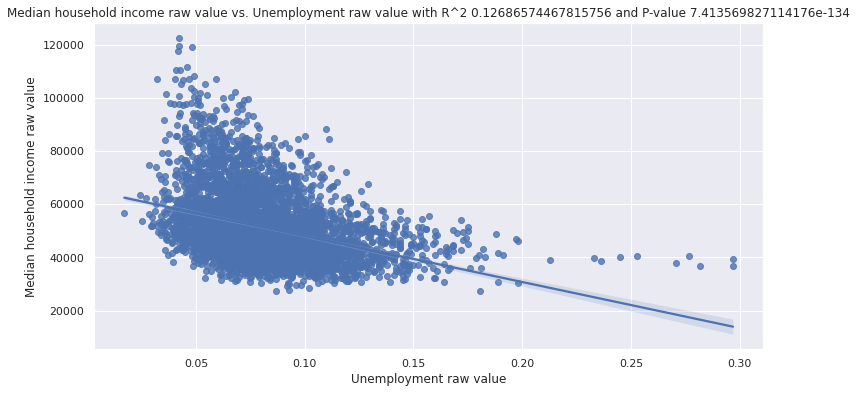

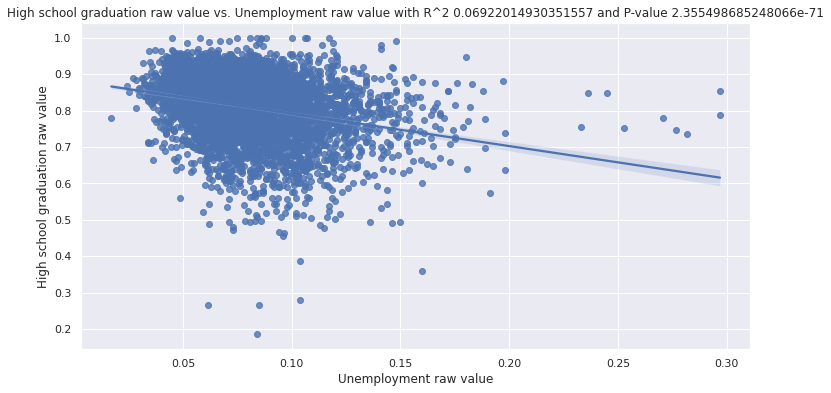

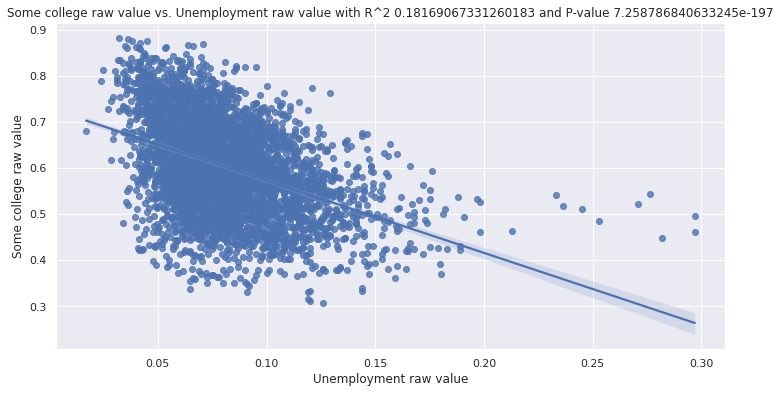

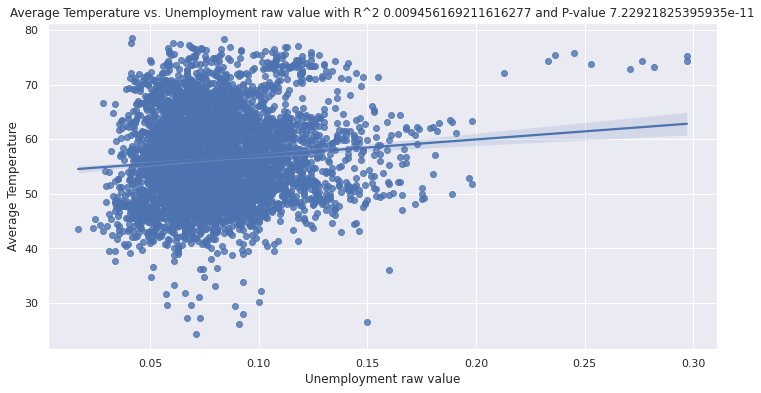

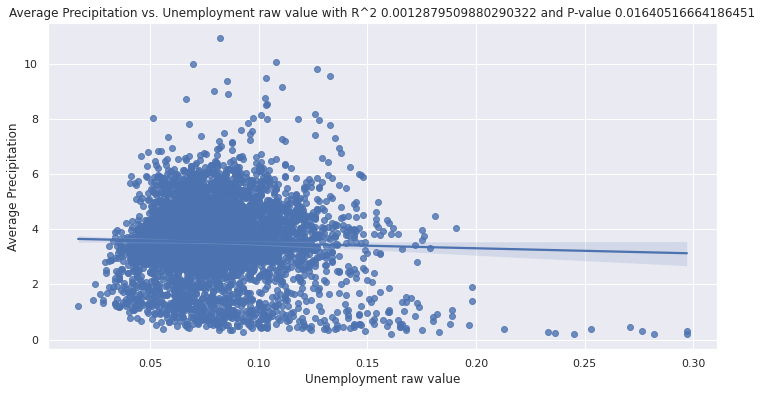

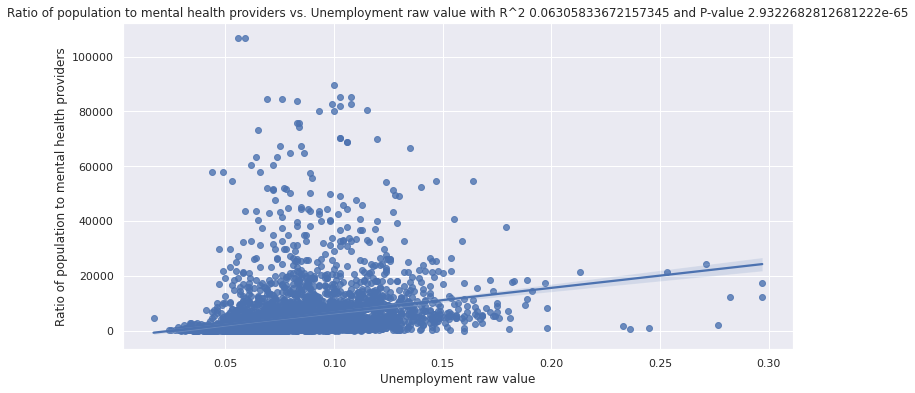

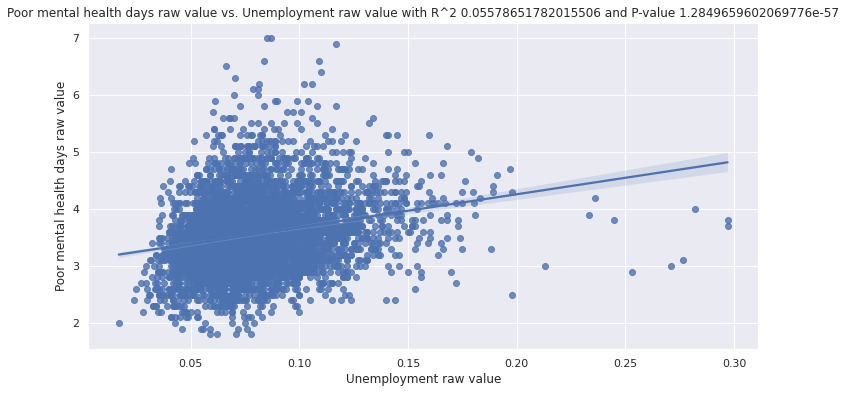

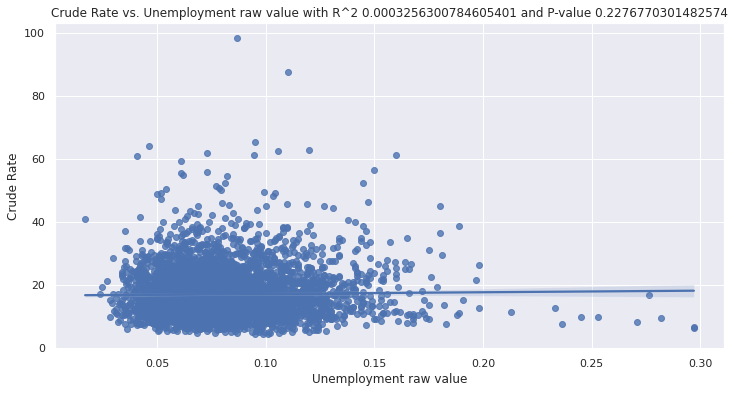

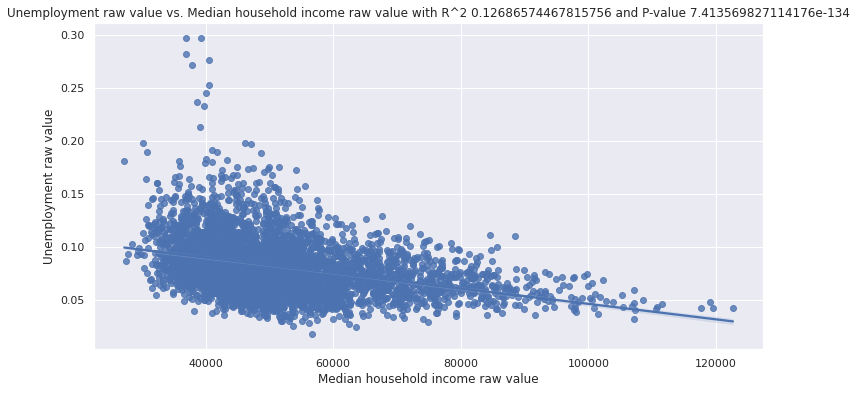

<Figure size 864x432 with 0 Axes>

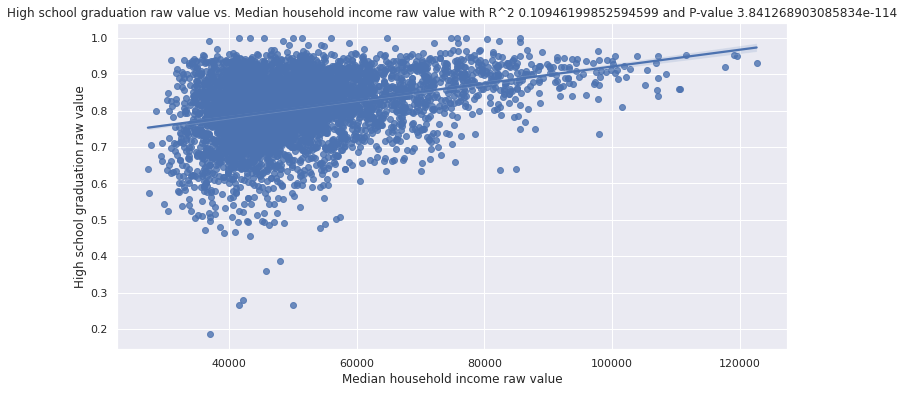

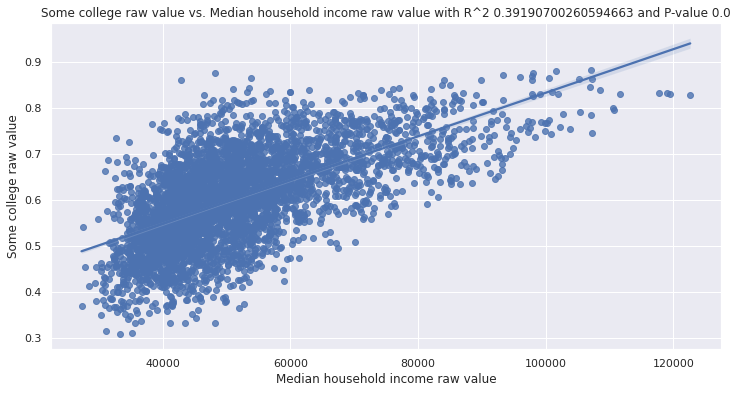

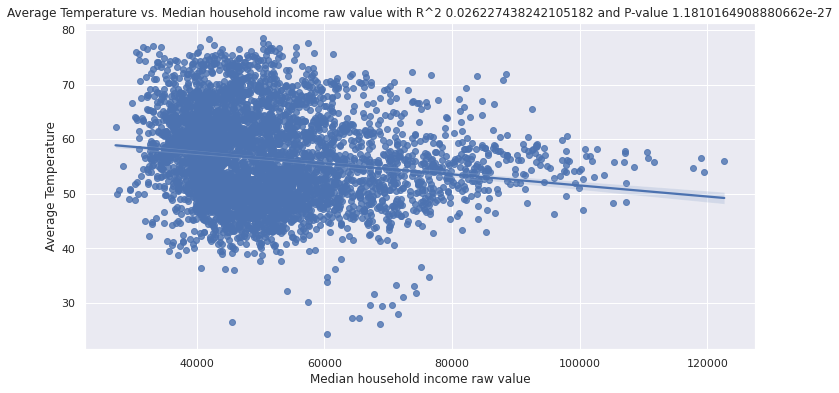

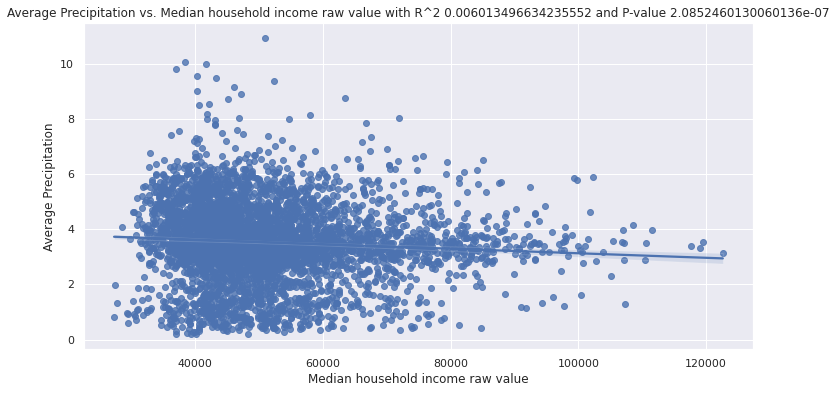

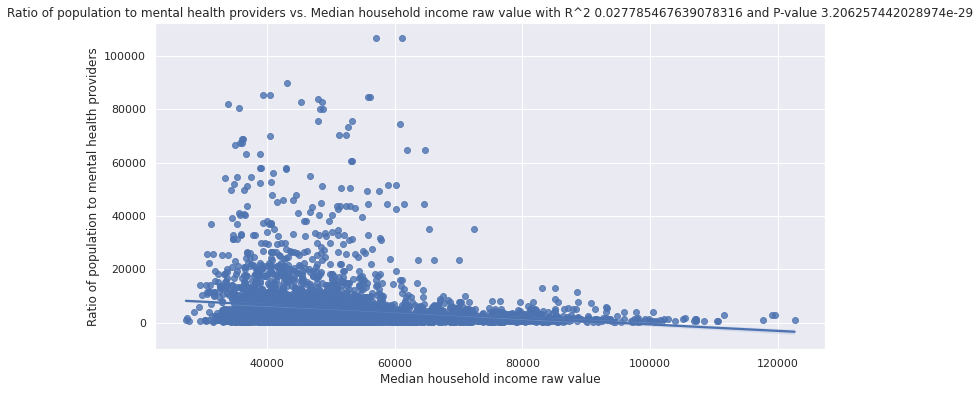

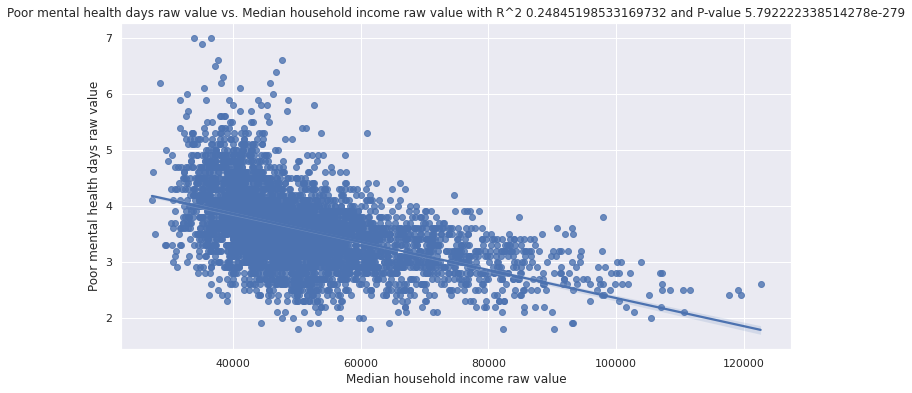

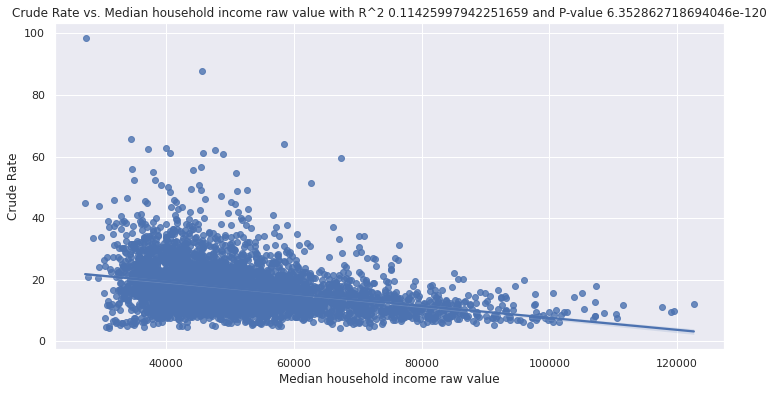

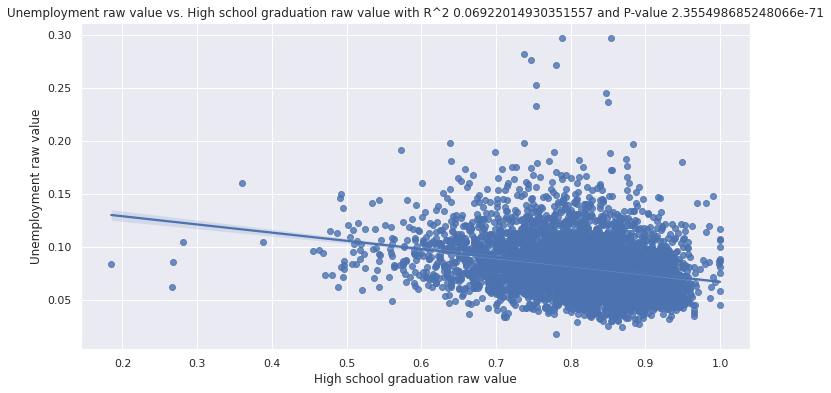

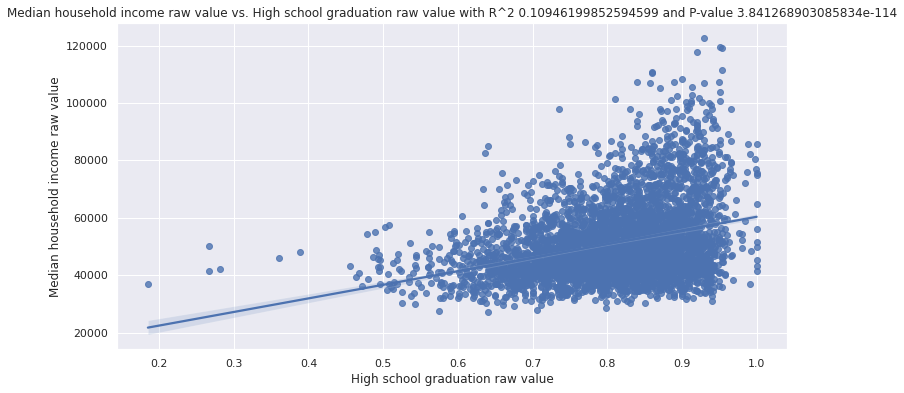

<Figure size 864x432 with 0 Axes>

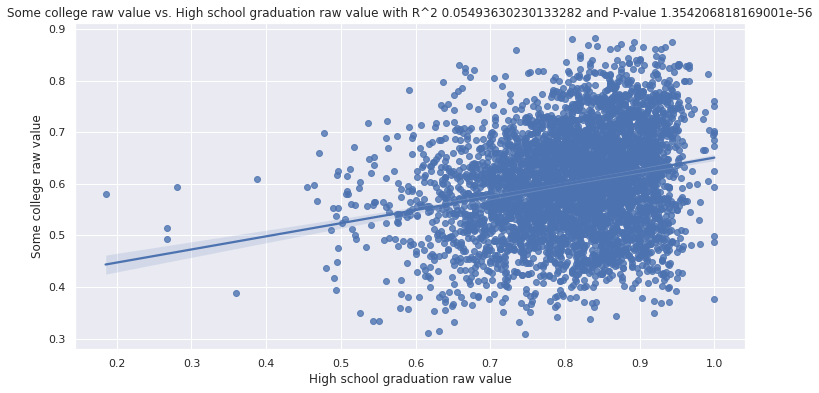

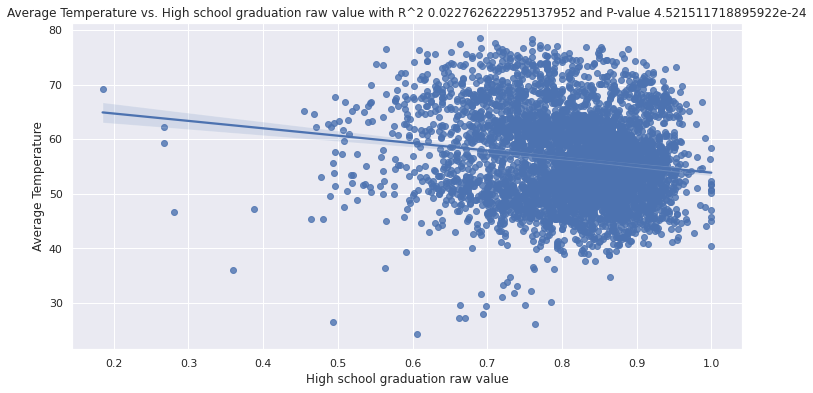

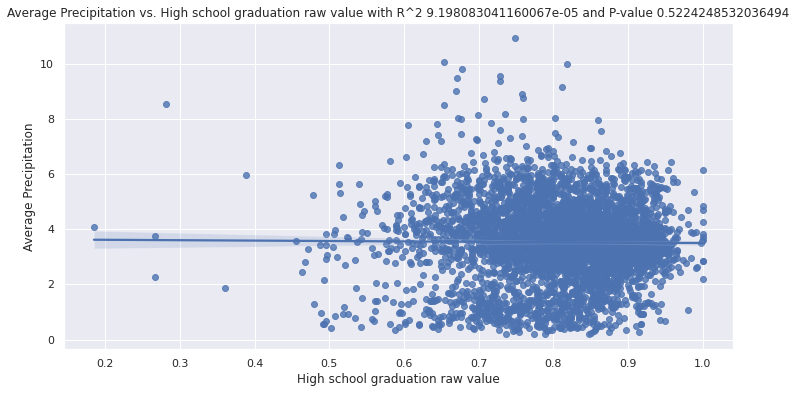

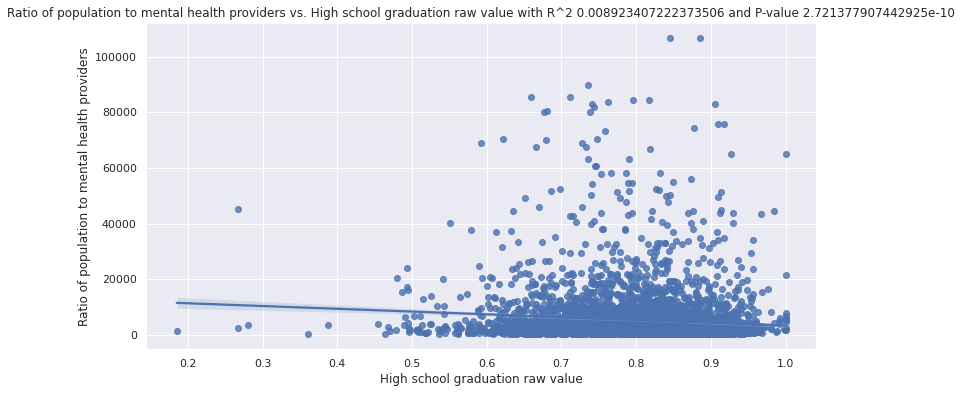

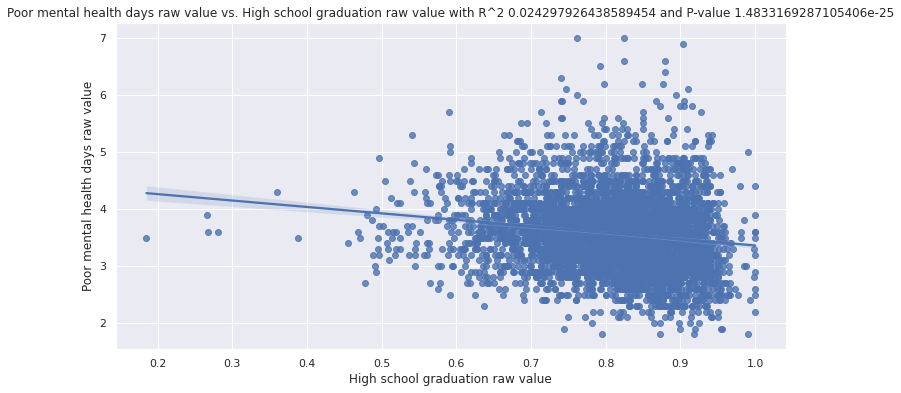

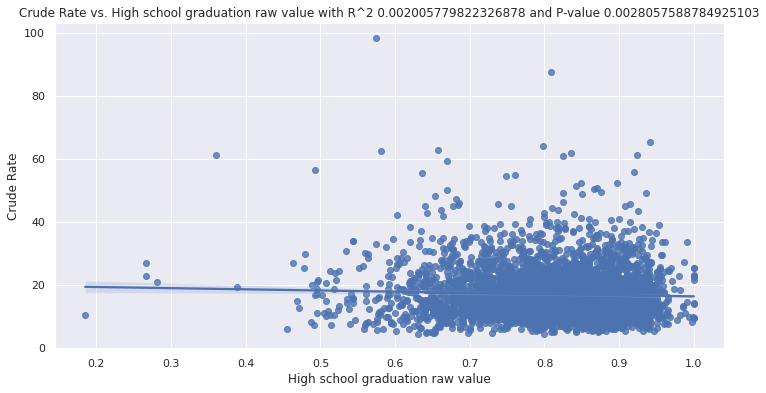

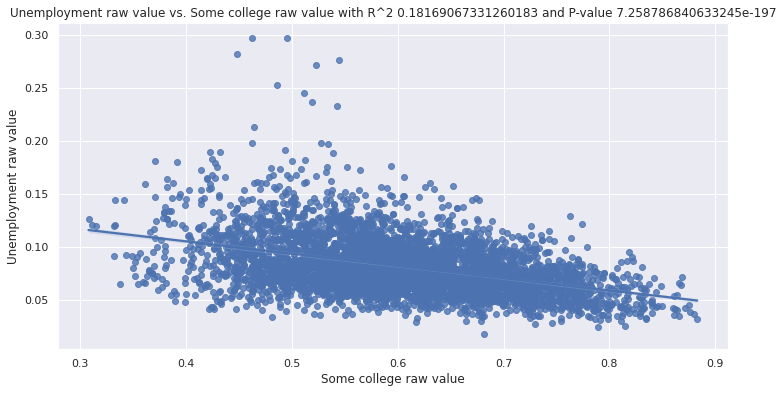

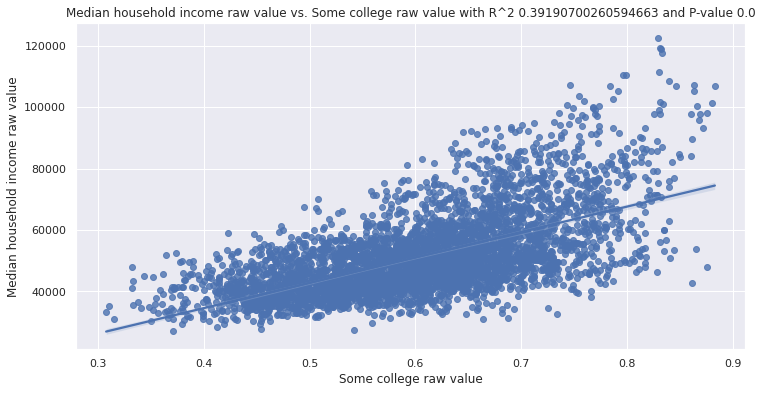

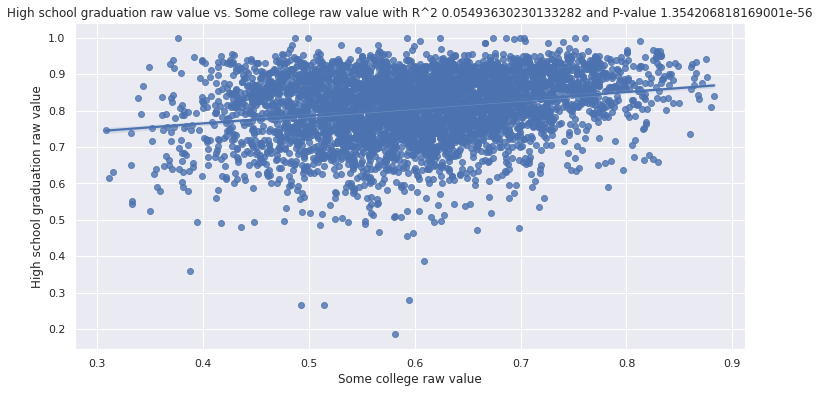

<Figure size 864x432 with 0 Axes>

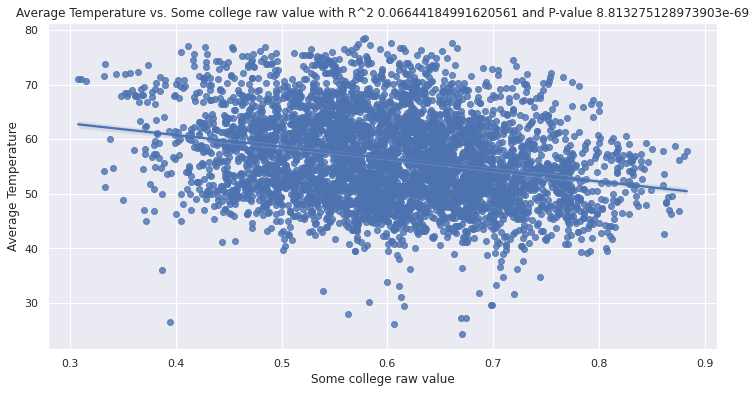

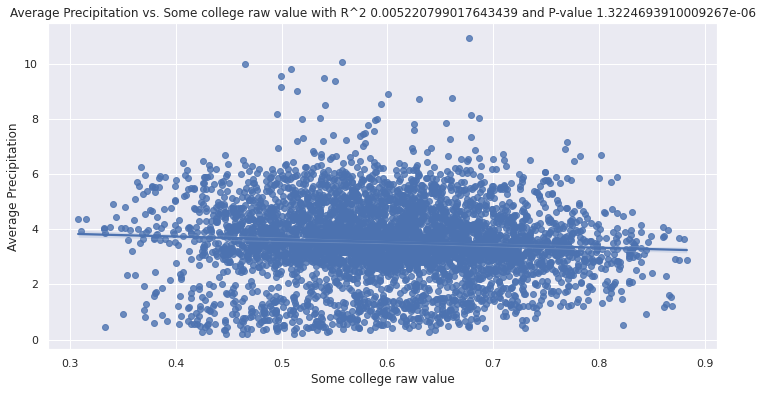

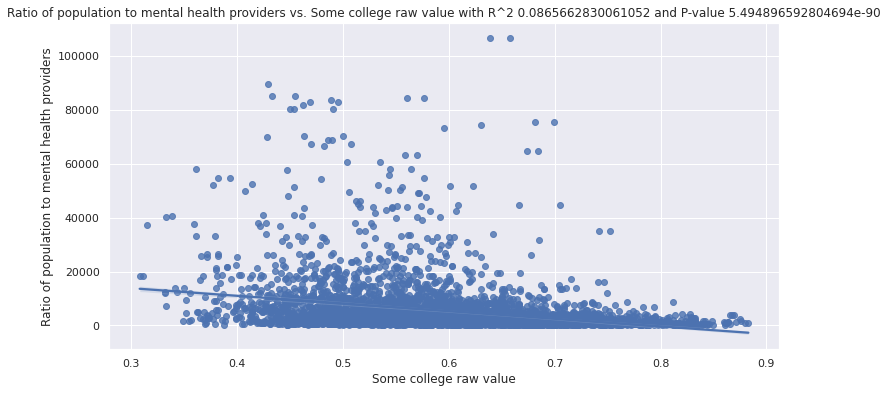

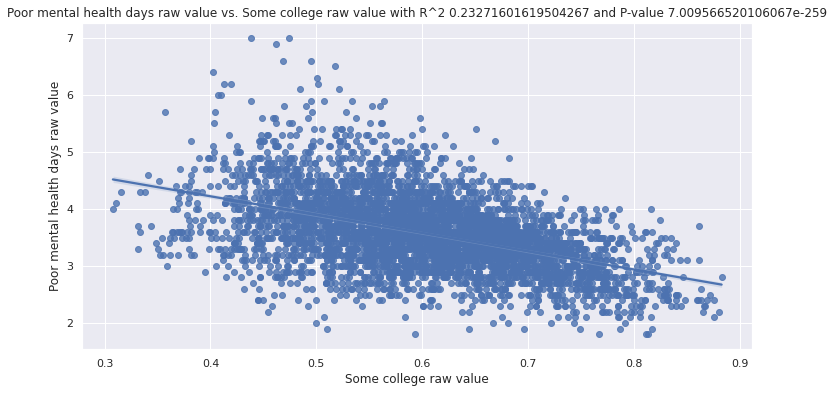

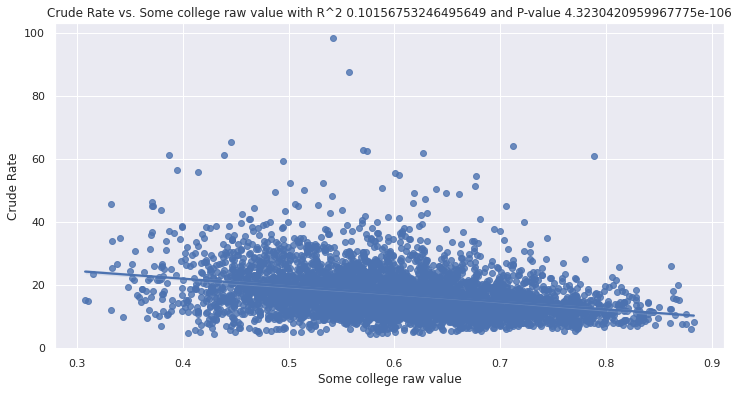

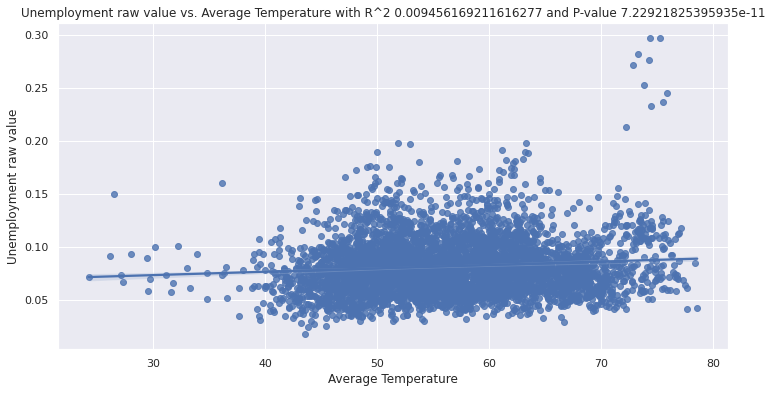

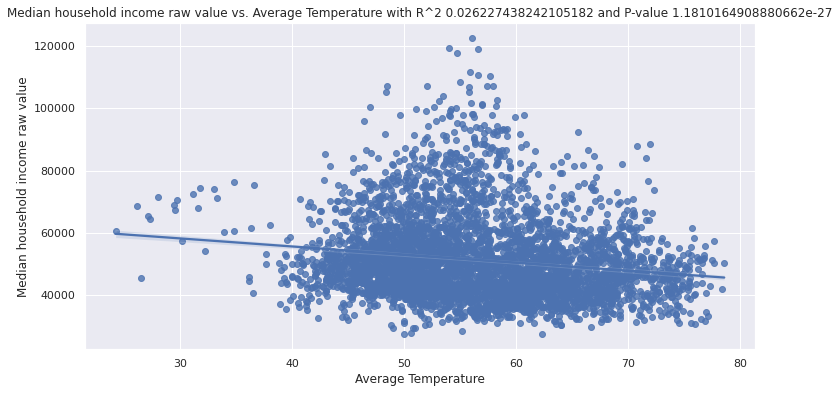

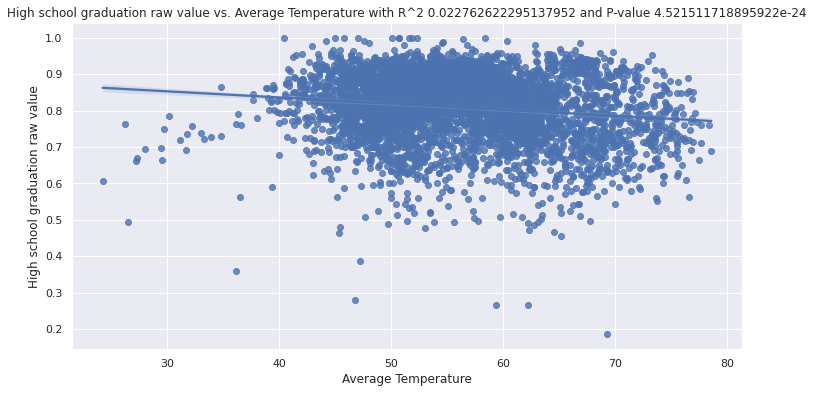

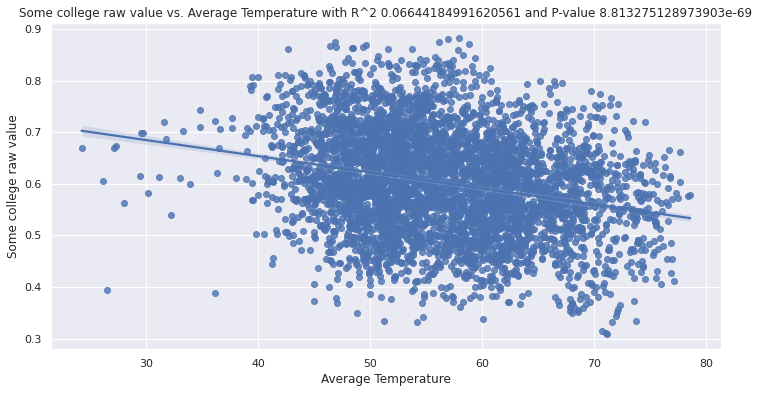

<Figure size 864x432 with 0 Axes>

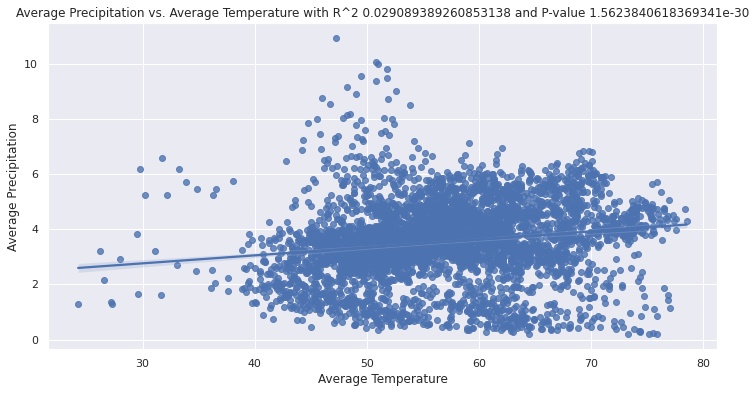

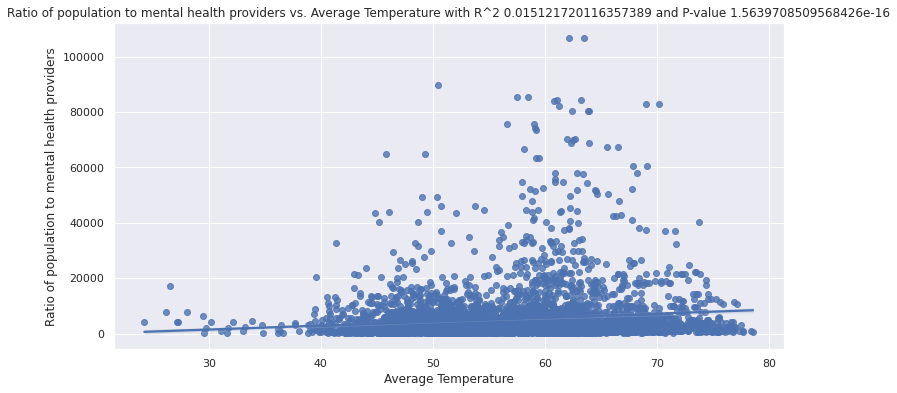

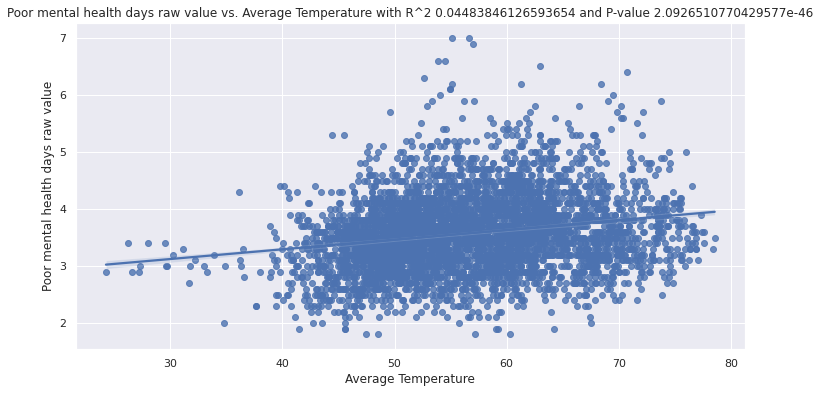

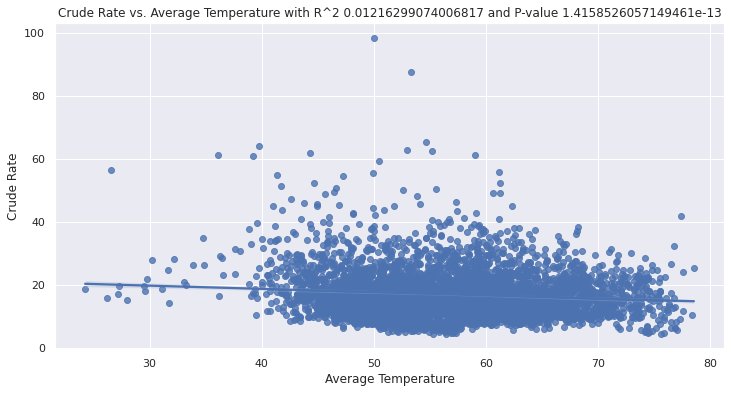

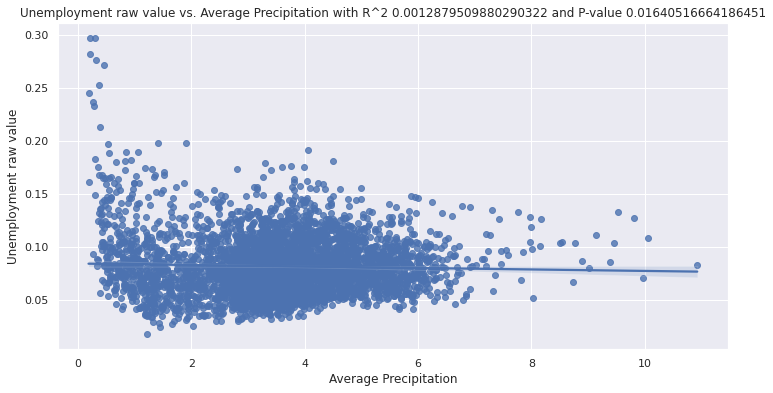

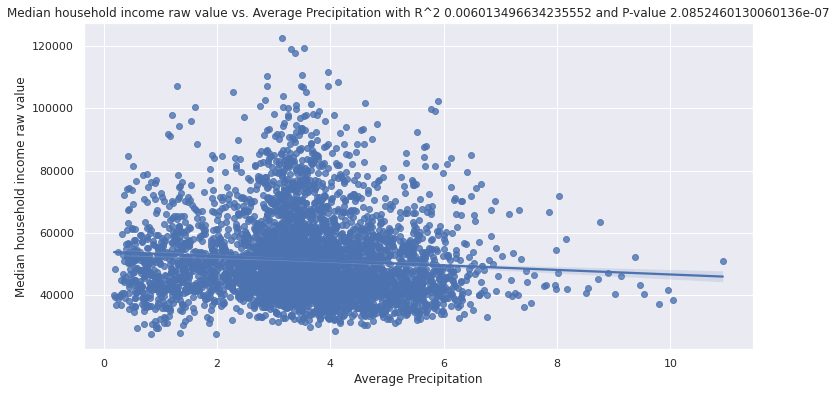

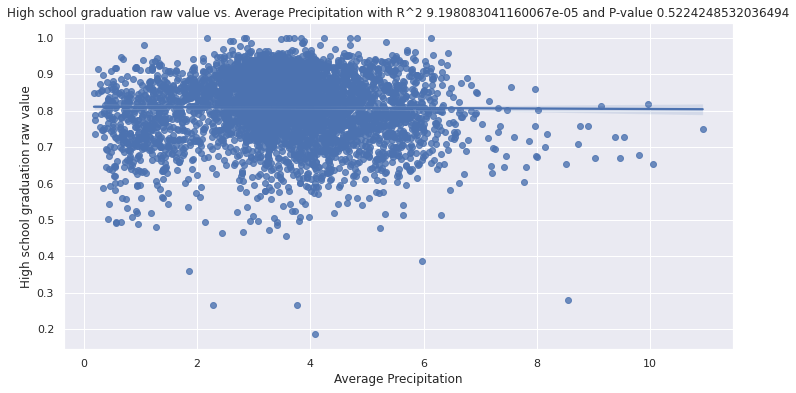

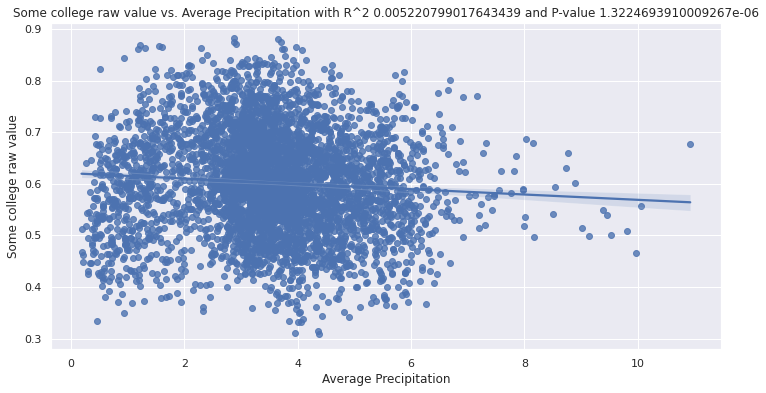

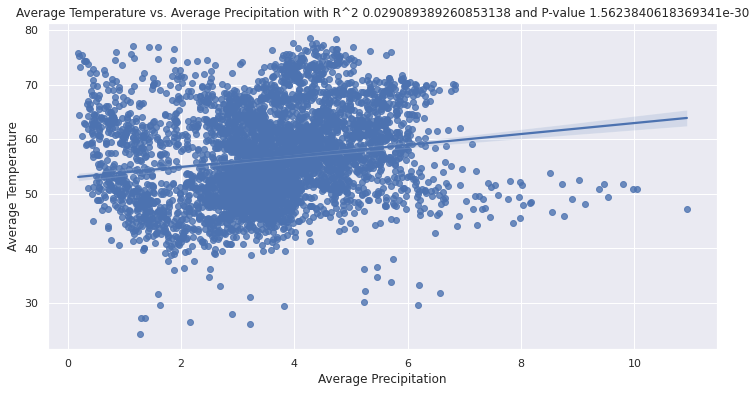

<Figure size 864x432 with 0 Axes>

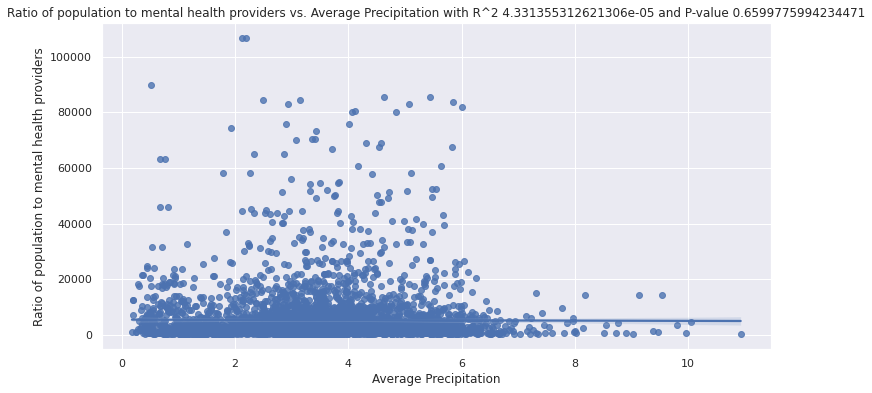

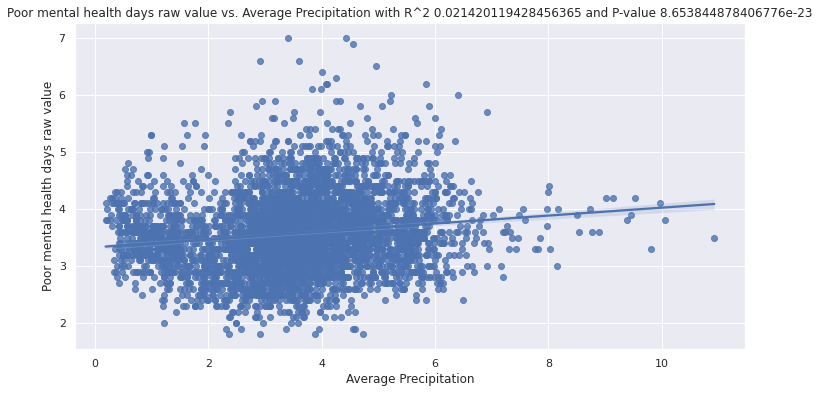

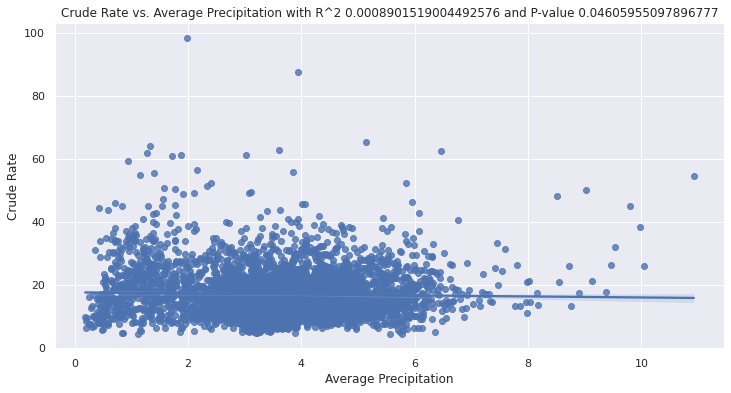

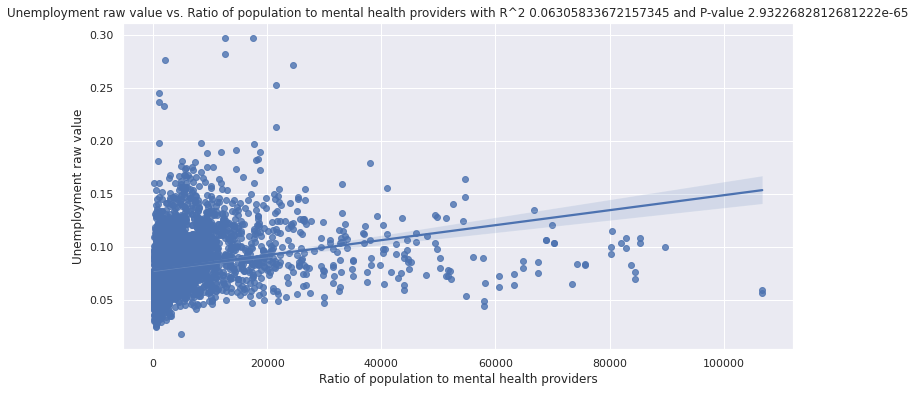

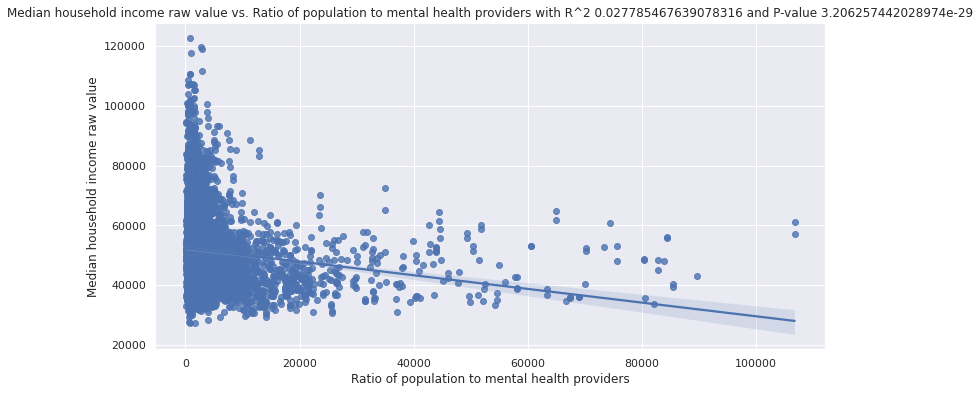

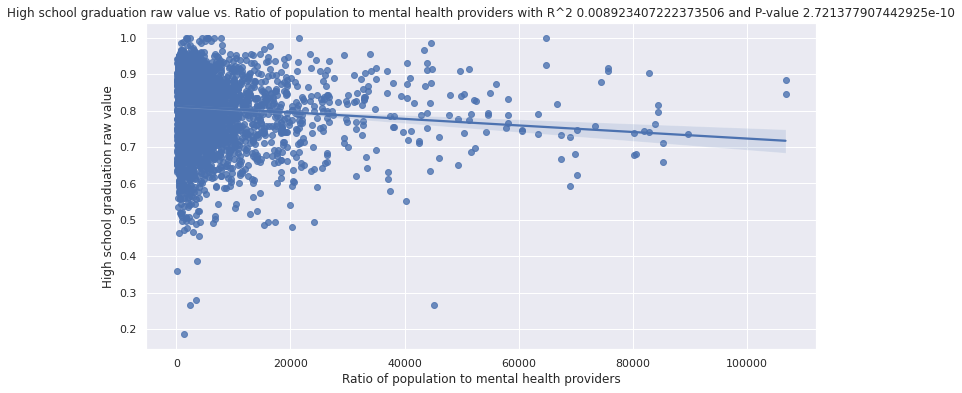

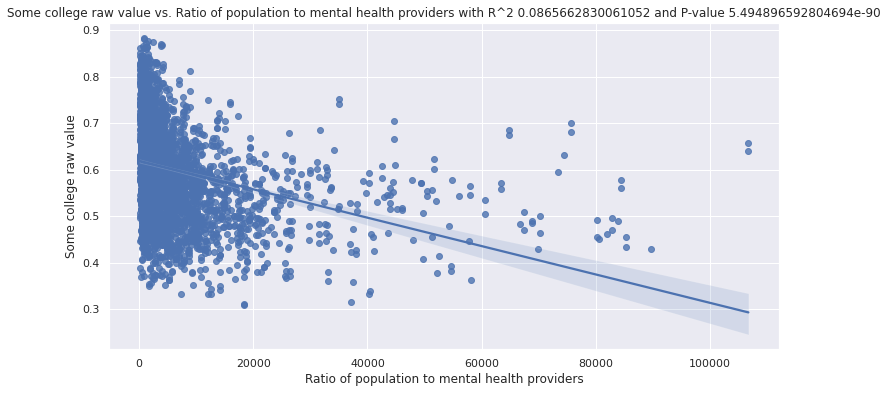

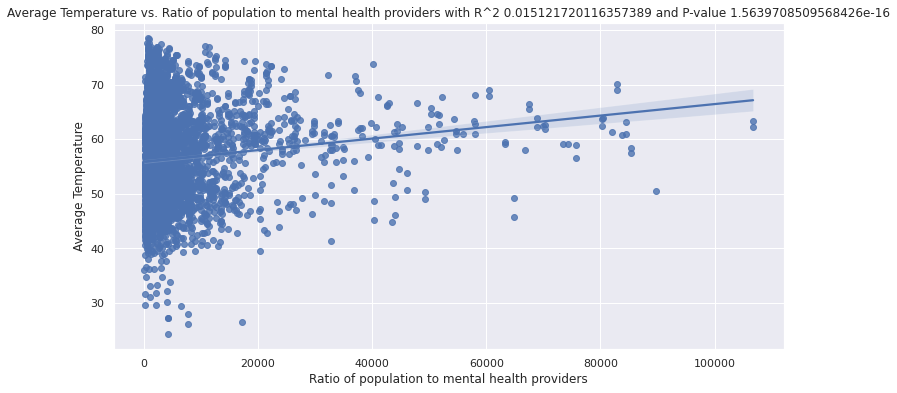

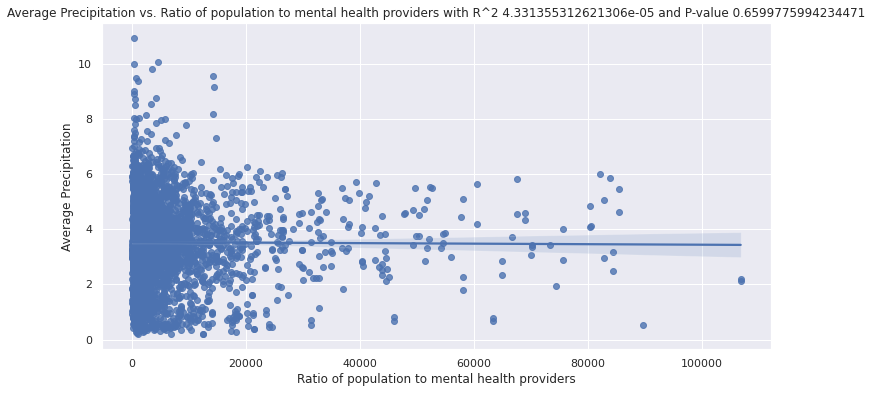

<Figure size 864x432 with 0 Axes>

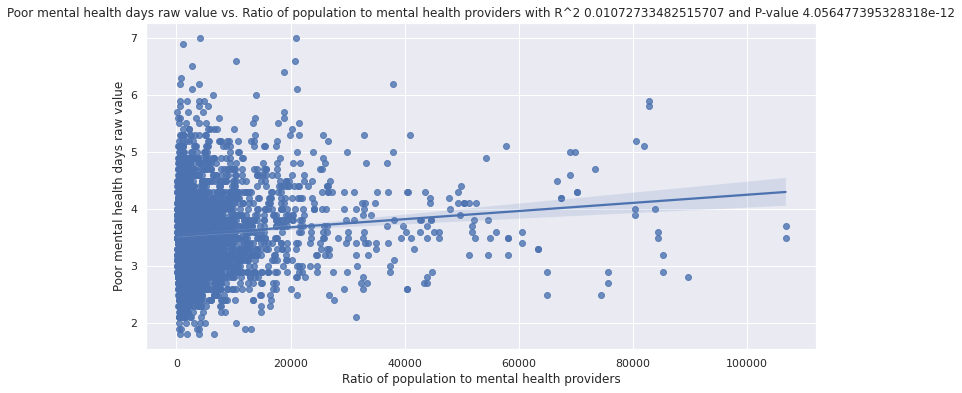

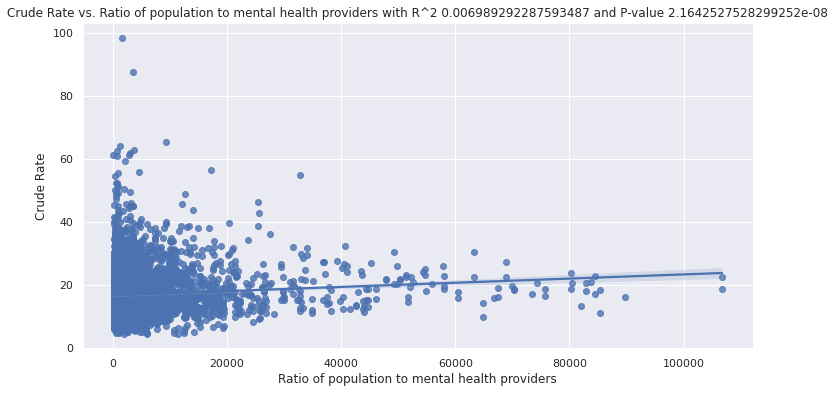

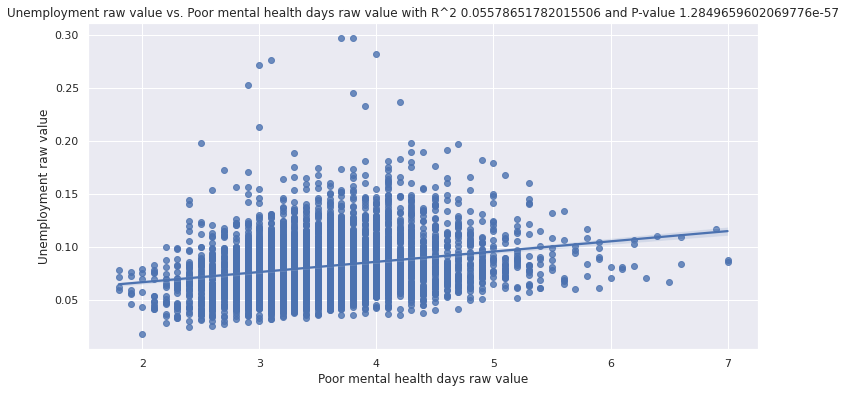

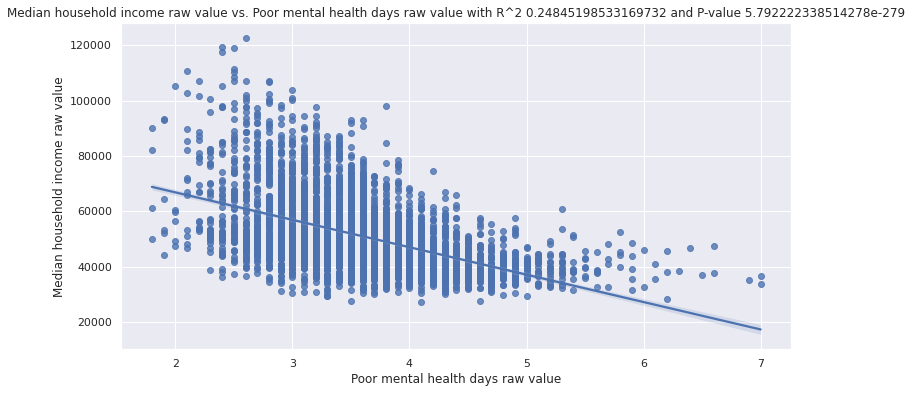

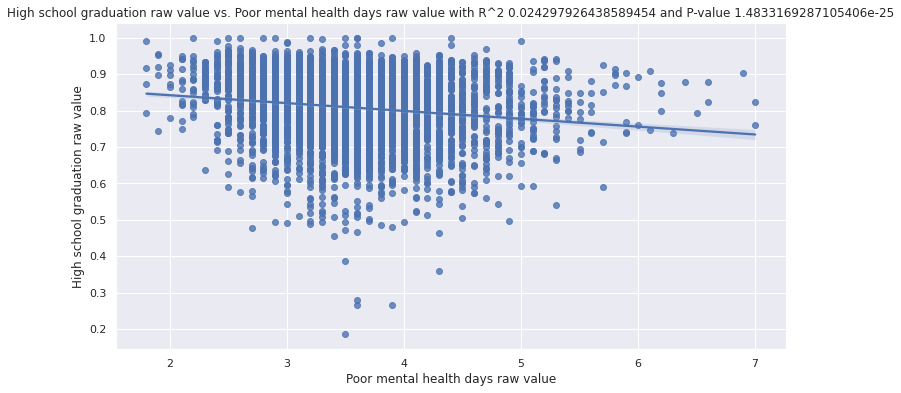

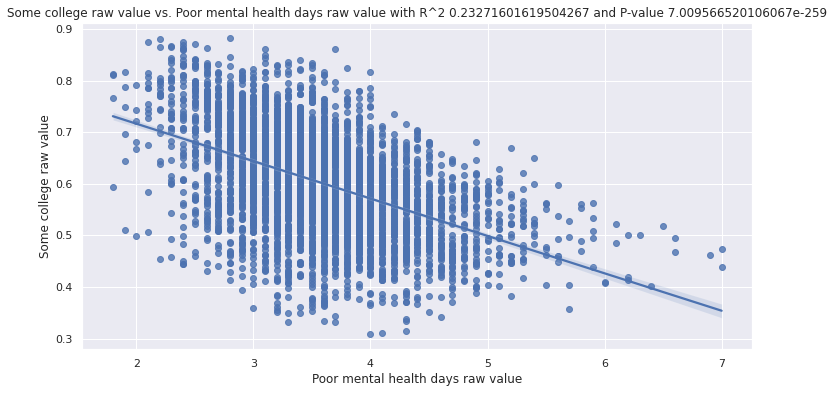

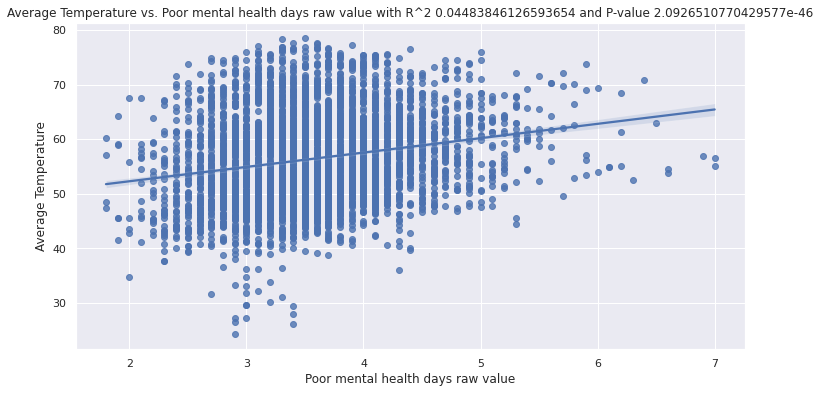

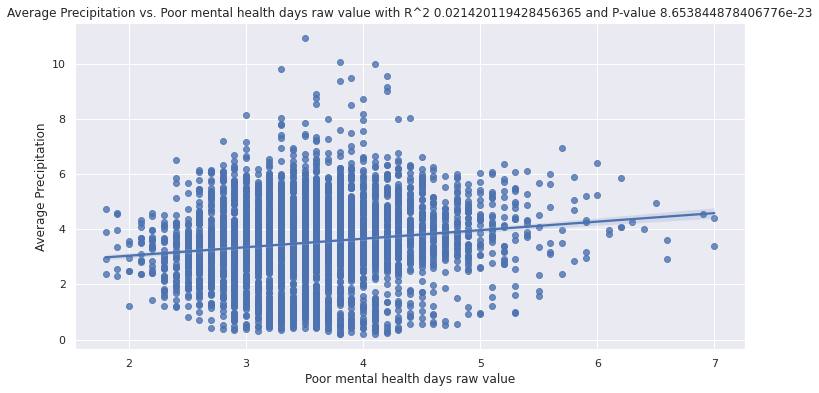

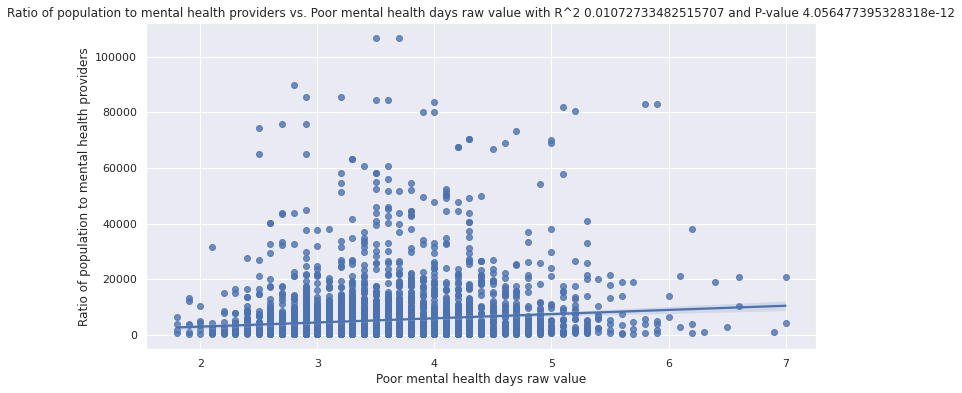

<Figure size 864x432 with 0 Axes>

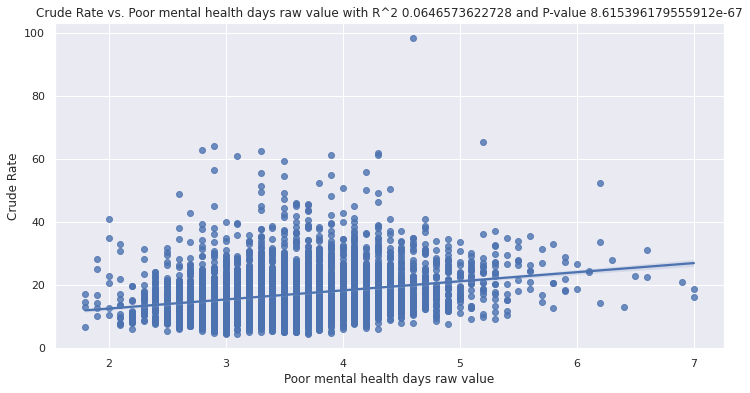

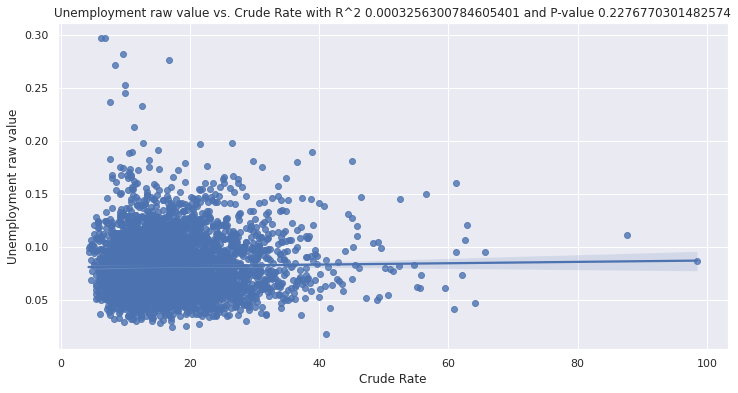

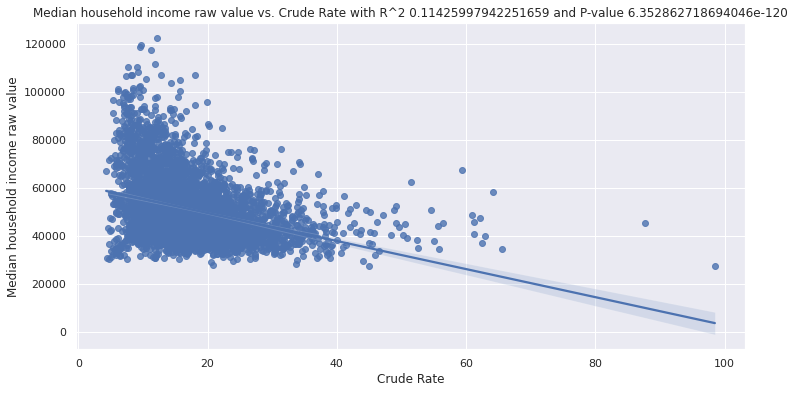

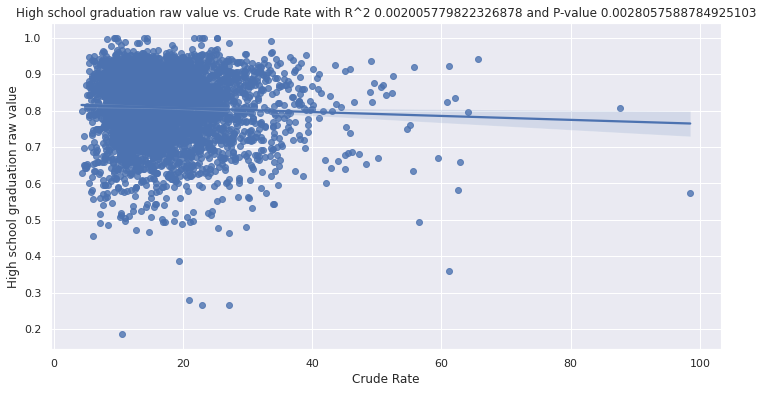

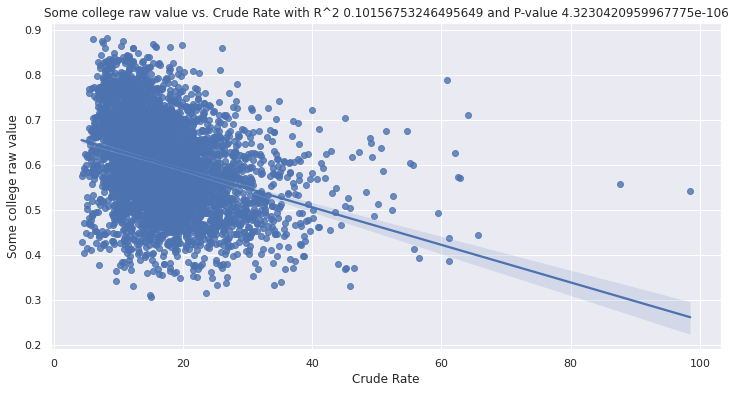

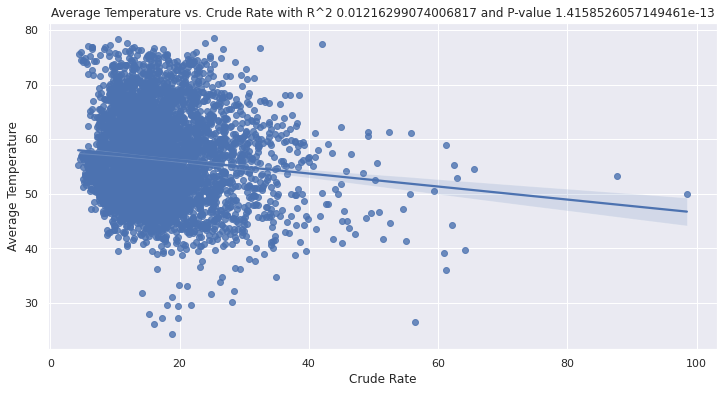

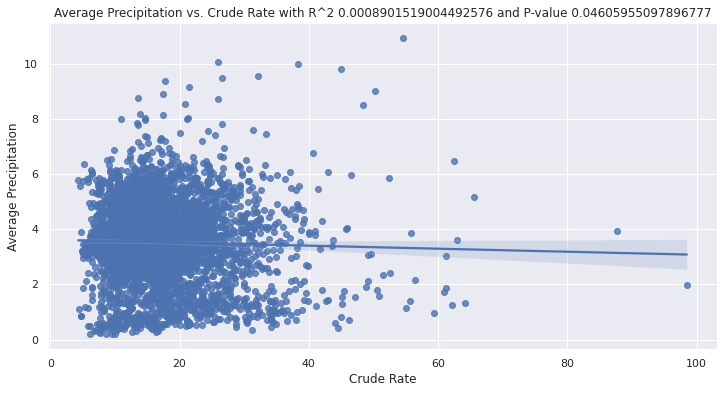

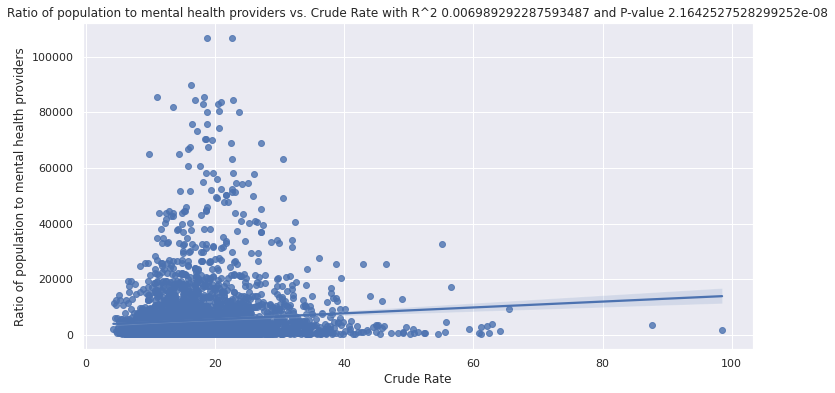

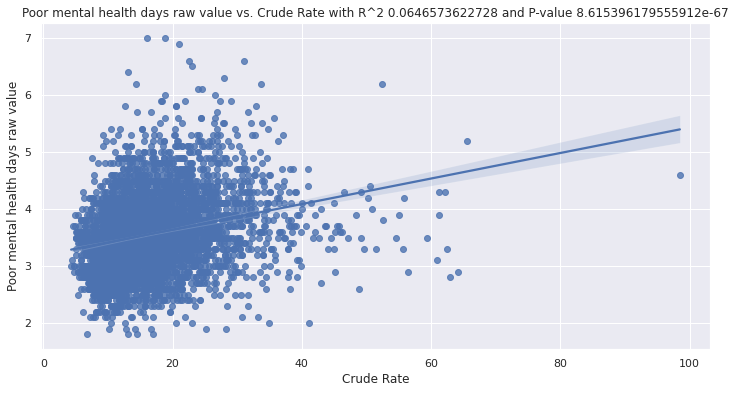

<Figure size 864x432 with 0 Axes>

In [8]:
sns.set_theme()
for i, i_field in enumerate(independent_fields + dependent_fields):
    for j, d_field in enumerate(independent_fields + dependent_fields):
        plt.figure(i * len(dependent_fields) + j, figsize=(12, 6))
        if i_field == d_field:
            continue
        corr_df = filtered_df[[i_field, d_field]].replace([np.inf, -np.inf], np.nan).dropna()
        sns.regplot(x=i_field, y=d_field, data=corr_df)
        r,p = stats.pearsonr(corr_df[i_field], corr_df[d_field])
        plt.title('{} vs. {} with R^2 {} and P-value {}'.format(d_field, i_field, r**2, p))
        plt.show()

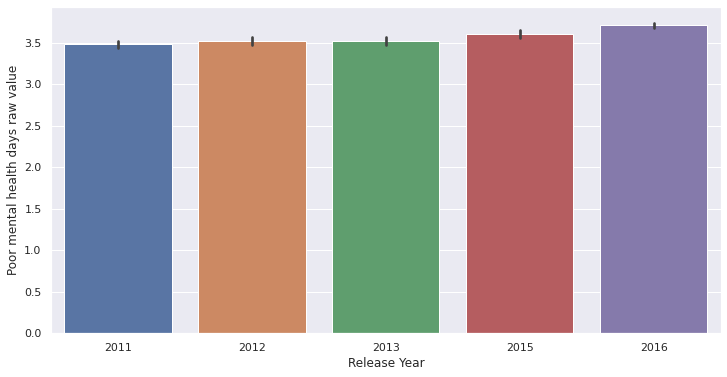

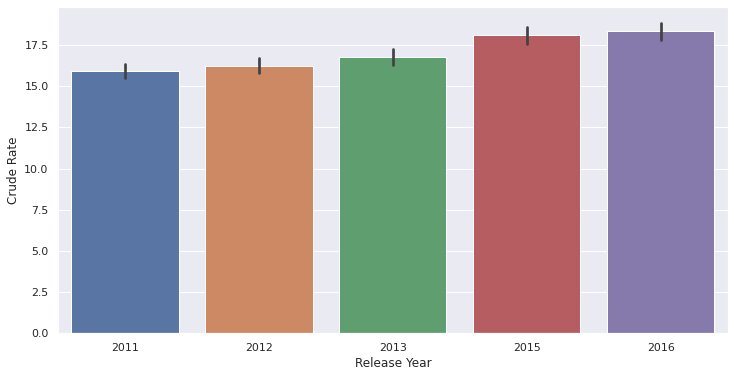

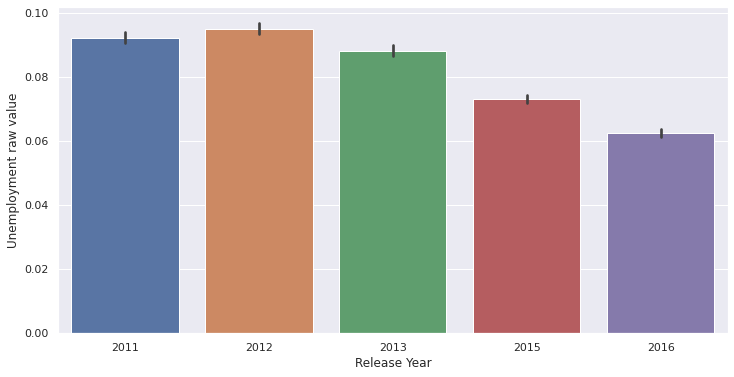

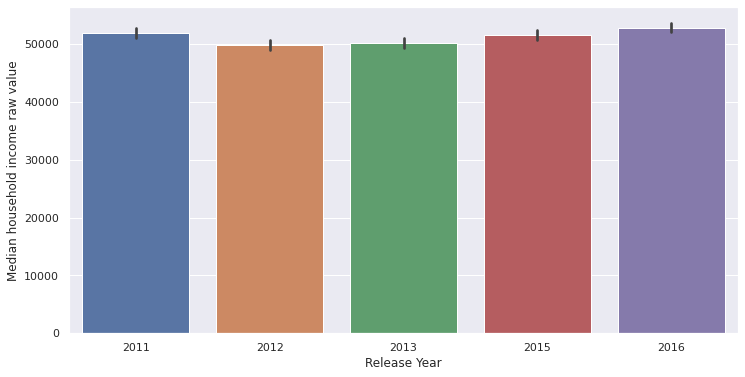

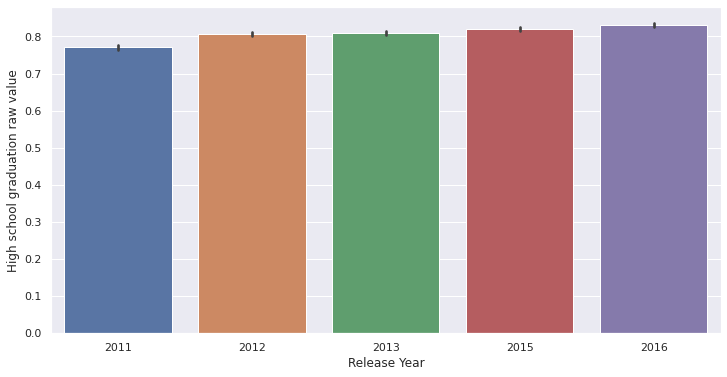

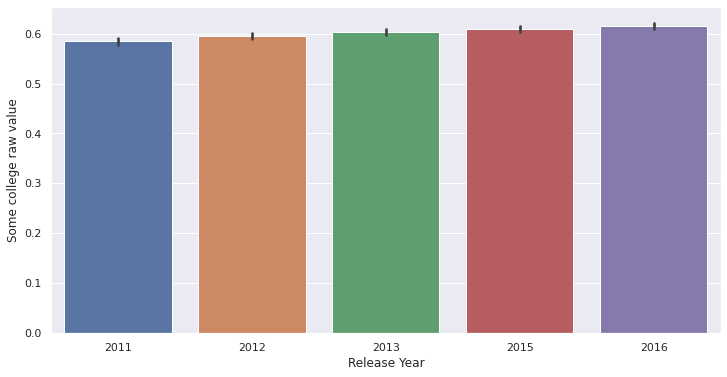

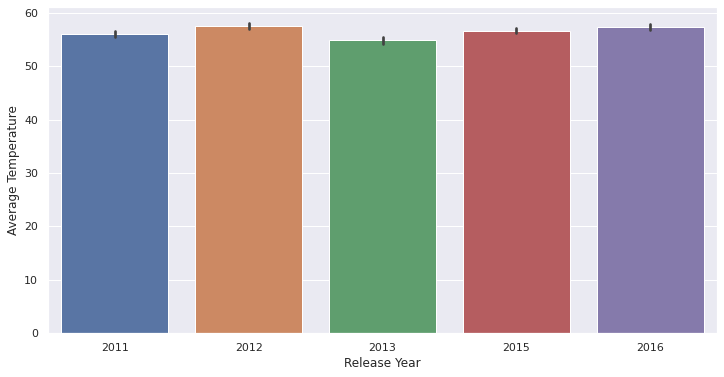

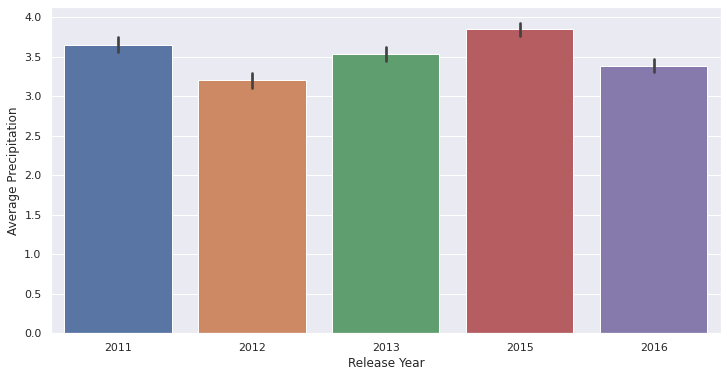

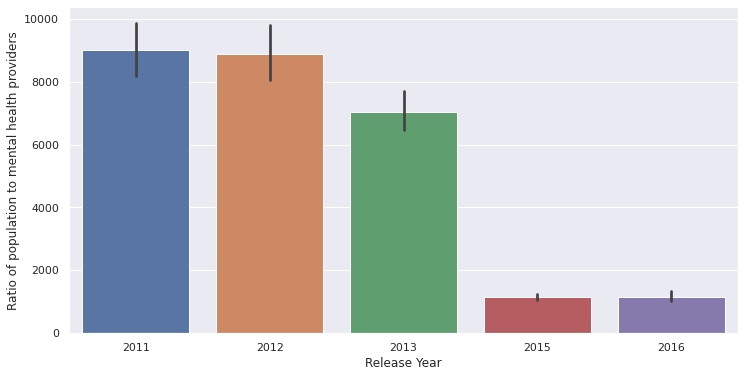

In [9]:
# Plot distributions on a single plot instead of on gridded subplots
years = sorted(filtered_df['Release Year'].unique()) # get unique year
# print(years)
for i, field in enumerate(dependent_fields + independent_fields): # create bar plots for all dependent fields
    plt.figure(i, figsize=(12,6))
    sns.barplot(x='Release Year', y=field, data=filtered_df)
    plt.show()